### Load packages and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
feature = pd.read_csv("Retail/Features data set.csv")
sales = pd.read_csv("Retail/sales data-set.csv")
store = pd.read_csv("Retail/stores data-set.csv")

In [11]:
feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


Bộ dữ liệu **feature** bao gồm có 12 cột: 

* Store: số cửa hàng
* Temperature: nhiệt độ trung bình trong khu vực
* Fuel_Price: chi phí nhiên liệu trong khu vực
* MarkDown1-5: dữ liệu liên quan đến giảm giá khuyến mại, khuyến mại này chỉ có hiệu lực sau tháng 11 năm 2011 và không phải lúc nào cũng có sẵn cho tất cả các cửa hàng. 
* CPI: chỉ số giá tiêu dùng
* Unemployment: tỉ lệ thất nghiệp
* IsHoliday: có phải ngày lễ đặc biệt gì hay không

In [12]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


Bộ dữ liệu **Sales** gồm có 5 cột: Store, Dept, Date, Weekly_Sales, IsHoliday. Trong đó:
    
* Dept: số của phòng ban
* Weekly_Sales: doanh số bán hàng trong tuần

In [6]:
store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


Bảng **store** bao gồm thông tin ẩn danh của 45 cửa hàng bao gồm loại và kích thước

In [3]:
# Kết hợp các bảng dữ liệu lại với nhau
df_sale = pd.merge(sales, store, on = "Store")
df = pd.merge(df_sale, feature, on = ["Store", "Date", "IsHoliday"])

In [14]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,05/02/2010,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,05/02/2010,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,05/02/2010,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,05/02/2010,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,05/02/2010,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [4]:
#Định dạng của cột Date đang không đúng, ta sẽ sửa lại
df["Date"] = pd.to_datetime(df["Date"])

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
Size,421570.0,136727.915739,60980.583328,34875.000,93638.000000,140167.00000,202505.000000,219622.000000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,150681.0,7246.420196,8291.221345,0.270,2240.270000,5347.45000,9210.900000,88646.760000
MarkDown2,111248.0,3334.628621,9475.357325,-265.760,41.600000,192.00000,1926.940000,104519.540000
MarkDown3,137091.0,1439.421384,9623.078290,-29.100,5.080000,24.60000,103.990000,141630.610000
MarkDown4,134967.0,3383.168256,6292.384031,0.220,504.220000,1481.31000,3595.040000,67474.850000


In [20]:
# Kiểm tra giá trị null
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

Các cột giảm giá đều chứa giá trị null, ta sẽ thay thế giá trị null bằng giá trị 0


In [5]:
df.fillna(0, inplace = True)

In [22]:
# Kiểm tra giá trị trùng lặp
df.duplicated().any()

False

Bộ dữ liệu không chứa giá trị trùng lặp

In [6]:
# Để tiện cho công việc trực quan hóa dữ liệu, ta sẽ tách riêng ngày tháng năm trong cột Date ra
df["Day"] = df["Date"].dt.day
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df['Year-Month'] = df.Date.apply(lambda x: str(x)[:7])

In [7]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Day,Year,Month,Year-Month
0,1,1,2010-05-02,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2,2010,5,2010-05
1,1,2,2010-05-02,50605.27,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2,2010,5,2010-05
2,1,3,2010-05-02,13740.12,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2,2010,5,2010-05
3,1,4,2010-05-02,39954.04,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2,2010,5,2010-05
4,1,5,2010-05-02,32229.38,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2,2010,5,2010-05


### Explore Data Analysis

**Tổng doanh thu qua các năm**

In [8]:
df1 = df.groupby("Year-Month")["Weekly_Sales"].sum().reset_index()
df1

,Year-Month,Weekly_Sales
0,2010-01,4.223988e+07
1,2010-02,1.915869e+08
2,2010-03,1.862262e+08
3,2010-04,1.838118e+08
4,2010-05,2.806119e+08
5,2010-06,1.424361e+08
6,2010-07,1.842664e+08
7,2010-08,1.845381e+08
8,2010-09,1.797041e+08
9,2010-10,2.311201e+08


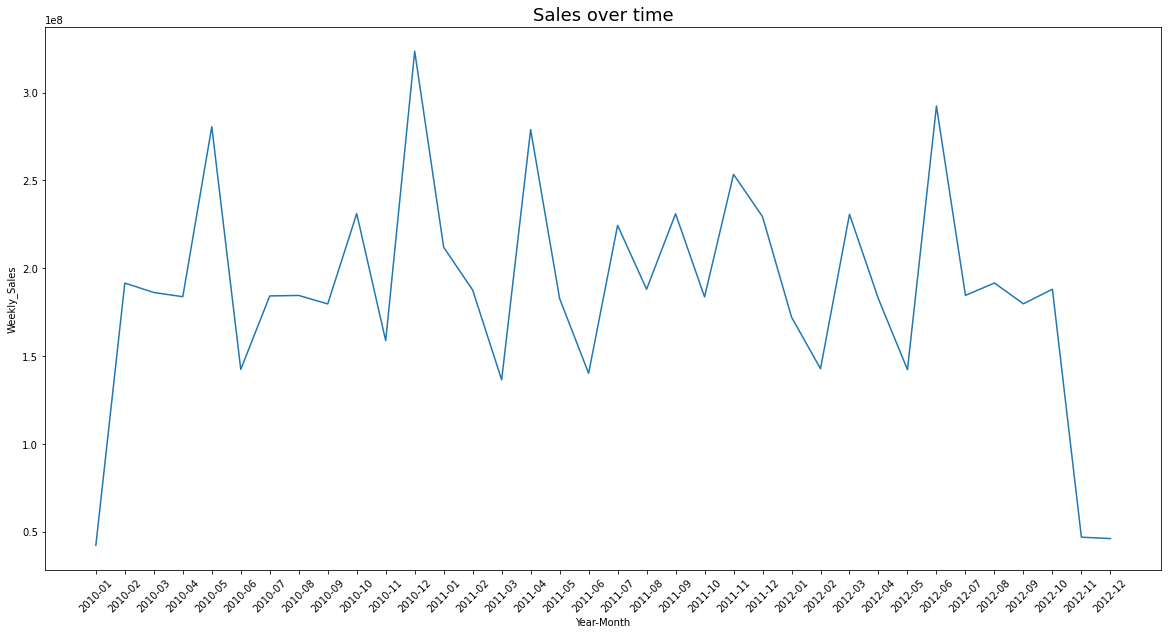

In [9]:
plt.figure(figsize = (20,10))
sns.lineplot(data = df1, x = 'Year-Month', y = "Weekly_Sales",ci = 1)
plt.xticks(rotation = 45)
plt.title("Sales over time", size = 18)
plt.show()

Có thể thấy doanh thu biến động lớn qua các tháng nhưng qua các năm lại khá ổn định, để chi tiết hơn, ta sẽ xem cụ thể doanh thu của từng năm là bao nhiêu.


In [101]:
df.groupby("Year")["Weekly_Sales"].sum().reset_index()


,Year,Weekly_Sales
0,2010,2.288886e+09
1,2011,2.448200e+09
2,2012,2.000133e+09


Rõ ràng từ năm 2010-2012, doanh thu không biến đổi quá nhiều

In [10]:
df2 = df.groupby("Year-Month")["Fuel_Price"].mean().reset_index()
df2

,Year-Month,Fuel_Price
0,2010-01,2.733064
1,2010-02,2.744178
2,2010-03,2.818446
3,2010-04,2.867639
4,2010-05,2.838073
5,2010-06,2.776504
6,2010-07,2.805773
7,2010-08,2.777474
8,2010-09,2.776715
9,2010-10,2.848813


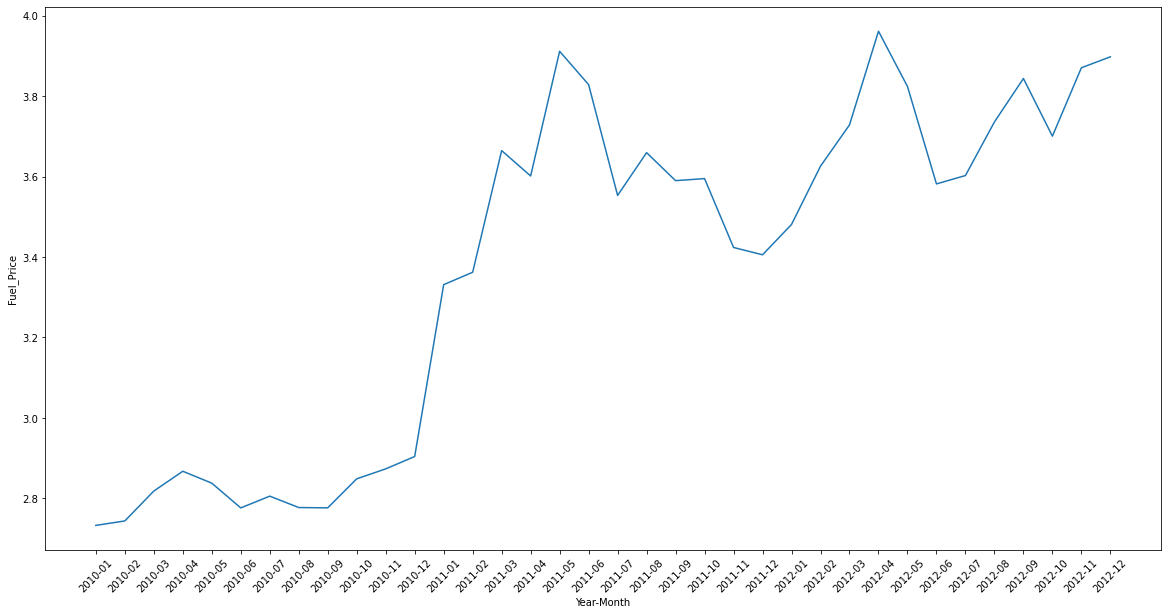

In [11]:
plt.figure(figsize = (20,10))
sns.lineplot(data = df2, x = 'Year-Month', y = 'Fuel_Price', ci = 1)
plt.xticks(rotation = 45)
plt.title("", size = 18)
plt.show()


Nhìn vào biểu đồ có thể thấy giá năng lượng bình ổn và ở mức thấp trong năm 2010. Vào đầu năm 2011, giá nhiên liệu đột ngột tăng vọt và gần như đi ngang trong khoảng 2 năm. Việc giá nguyên liệu tăng rất có thể sẽ ảnh hưởng tới doanh số bán hàng bởi để duy trì được lợi nhuận thì doanh nghiệp buộc phải tăng giá bán từ đó khiến cầu suy giảm

**Loại cửa hàng nào có doanh thu lớn nhất**

In [86]:
df3= df.groupby("Type")["Weekly_Sales"].sum().reset_index()
df3

,Type,Weekly_Sales
0,A,4.331015e+09
1,B,2.000701e+09
2,C,4.055035e+08


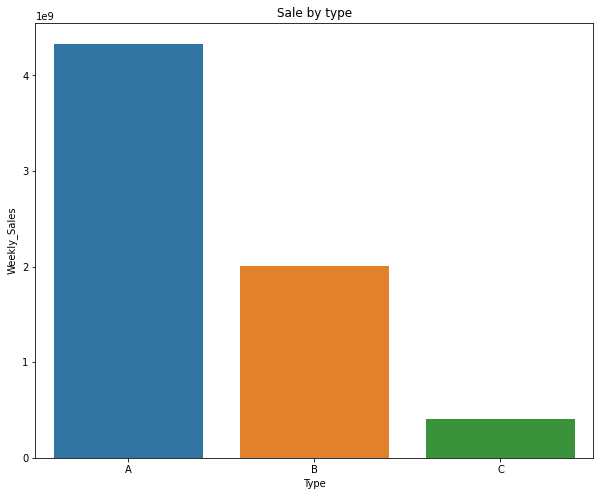

In [89]:
plt.figure(figsize = (10,8))
sns.barplot(data = df3, x = "Type", y = "Weekly_Sales")
plt.title("Sale by type")
plt.show()

Cửa hàng loại A có doanh thu lớn nhất, tiếp theo là loại B, loại C có doanh thu nhỏ nhất. Điều này dường như là hợp lí vì cửa hàng loại A về không gian, chủng loại sản phẩm, chất lượng dịch vụ bao giờ cũng tốt hơn các cửa hàng khác

**Top cửa hàng có doanh thu lớn nhất**

In [105]:
df4 = df.groupby(["Store", "Type"])["Weekly_Sales"].sum().reset_index().sort_values(by = "Weekly_Sales", ascending = False).head(10)
df4

,Store,Type,Weekly_Sales
19,20,A,3.013978e+08
3,4,A,2.995440e+08
13,14,A,2.889999e+08
12,13,A,2.865177e+08
1,2,A,2.753824e+08
9,10,B,2.716177e+08
26,27,A,2.538559e+08
5,6,A,2.237561e+08
0,1,A,2.224028e+08
38,39,A,2.074455e+08


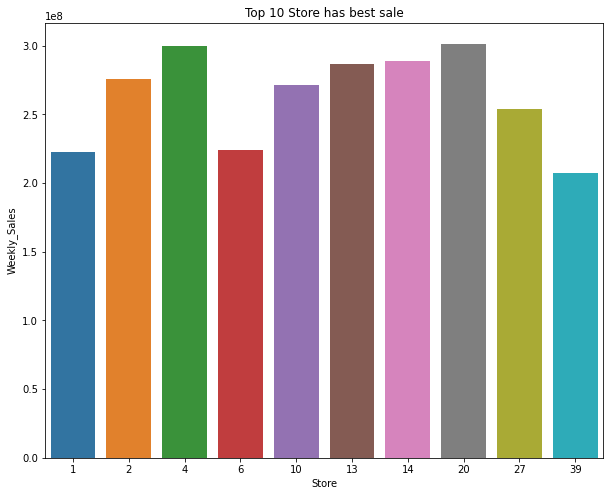

In [106]:
plt.figure(figsize = (10,8))
sns.barplot(data = df4, x = "Store", y = "Weekly_Sales")
plt.title("Top 10 Store has best sale")
plt.show()

Hầu hết các cửa hàng có doanh thu cao nhất đều là cửa hàng loại A

**Top cửa hàng có doanh thu thấp nhất**

In [104]:
df5 = df.groupby(["Store", "Type"])["Weekly_Sales"].sum().reset_index().sort_values(by = "Weekly_Sales", ascending = True).head(10)
df5

,Store,Type,Weekly_Sales
32,33,A,37160221.96
43,44,C,43293087.84
4,5,B,45475688.90
35,36,A,53412214.97
37,38,C,55159626.42
2,3,B,57586735.07
29,30,C,62716885.12
36,37,C,74202740.32
15,16,B,74252425.40
28,29,B,77141554.31


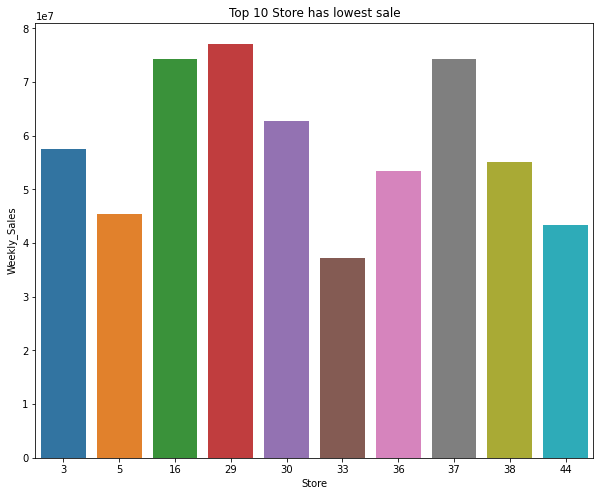

In [107]:
plt.figure(figsize = (10,8))
sns.barplot(data = df5, x = "Store", y = "Weekly_Sales")
plt.title("Top 10 Store has lowest sale")
plt.show()

Cửa hàng có doanh thu thấp nhất thuộc cả 3 loại: A, B, C. Việc doanh thu thấp không phải do loại cửa hàng, rất có thể doanh thu của các cửa hàng này bị ảnh hưởng bởi các yếu tố khác như: chất lượng dịch vụ, vị trí địa lí, diện tích cửa hàng, các chương trình khuyến mại,...

**Doanh thu theo Department**

In [21]:
df6 = df.groupby("Dept")["Weekly_Sales"].sum().reset_index().sort_values(by = "Weekly_Sales", ascending = False)
df6

,Dept,Weekly_Sales
73,92,4.839433e+08
76,95,4.493202e+08
36,38,3.931181e+08
60,72,3.057252e+08
71,90,2.910685e+08
...,...,...
49,51,3.057283e+04
63,78,1.714710e+03
37,39,1.779800e+02
41,43,1.432000e+01


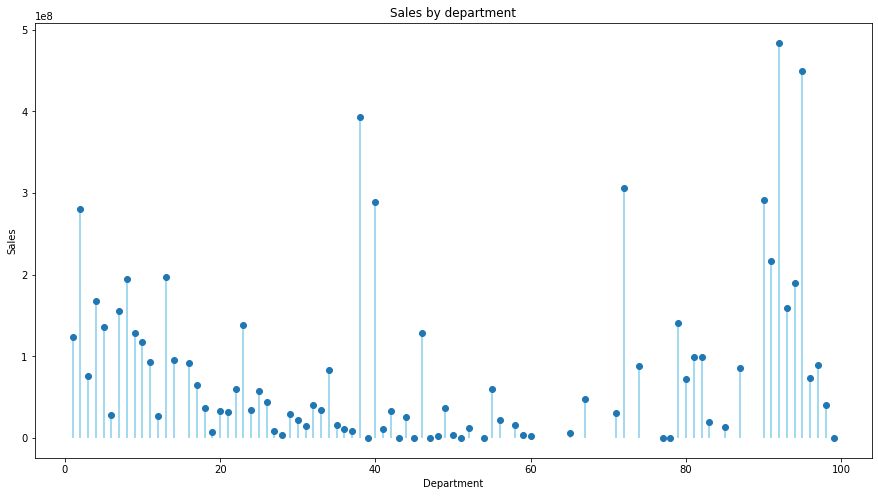

In [22]:
plt.figure(figsize = (15,8))
plt.vlines(x=df6["Dept"], ymin=0, ymax=df6['Weekly_Sales'], color='skyblue')
plt.plot(df6["Dept"],df6['Weekly_Sales'], "o")
plt.title("Sales by department")
plt.ylabel("Sales")
plt.xlabel("Department")
plt.show()

Một số phòng ban có doanh thu rất cao như 92,95,38,72,90 trong khi đó có những phòng ban có doanh thu vô cùng thấp, thậm chí còn bị âm. Khi cùng một điều kiện thị trường, chương trình khuyến mại thì yếu tố gây ra sự khác biệt giữa các phòng ban có thể là chiến lược, chất lượng nhân sự

**Doanh thu trung bình vào ngày lễ và ngày thường**

In [109]:
df.groupby("IsHoliday")["Weekly_Sales"].mean().reset_index()

,IsHoliday,Weekly_Sales
0,False,15901.445069
1,True,17035.823187


Doanh số vào những ngày lễ lớn hơn so với ngày thường, nhưng sự chênh lệch không quá lớn

**Chương trình khuyến mại ảnh hưởng thế nào tới doanh thu**

Text(0, 0.5, 'Markdown')

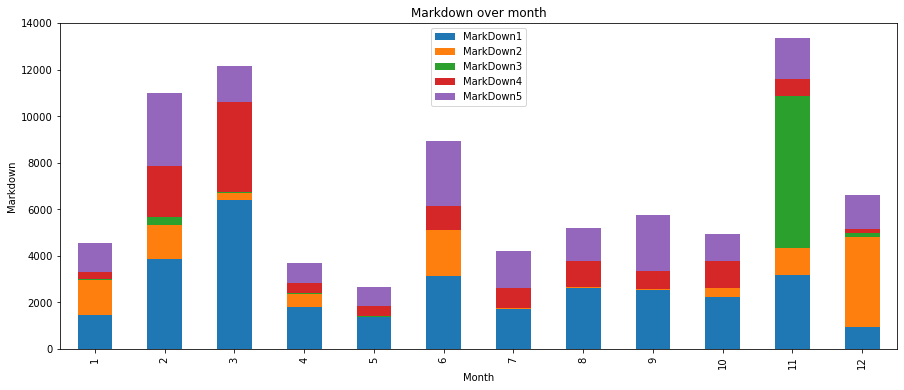

In [24]:
df7 = df.groupby("Month").agg({"MarkDown1":"mean","MarkDown2":"mean","MarkDown3":"mean","MarkDown4":"mean","MarkDown5":"mean"})

df7.plot(kind='bar', stacked=True,figsize=(15,6))
plt.title("Markdown over month")
plt.ylabel("Markdown")

So sánh biểu đồ khuyến mại của từng tháng so với biểu đồ thay đổi doanh thu qua các tháng ta thấy tháng có nhiều chương trình khuyến mại không mang lại doanh thu cao

Text(0, 0.5, 'Markdown')

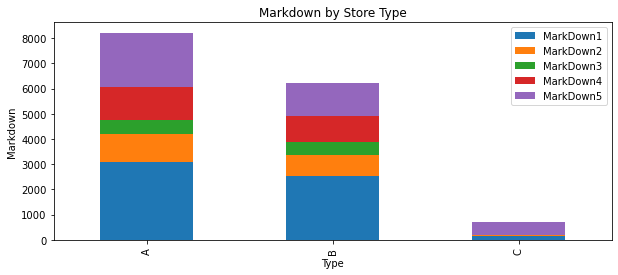

In [25]:
df8 = df.groupby("Type").agg({"MarkDown1":"mean","MarkDown2":"mean","MarkDown3":"mean","MarkDown4":"mean","MarkDown5":"mean"})

df8.plot(kind='bar', stacked=True,figsize=(10,4))
plt.title("Markdown by Store Type")
plt.ylabel("Markdown")

Cửa hàng loại A có nhiều chương trình khuyến mại nhất, đây cũng là loại cửa hàng có tổng doanh thu cao nhất

**Mối quan hệ giữa các biến**

<AxesSubplot:>

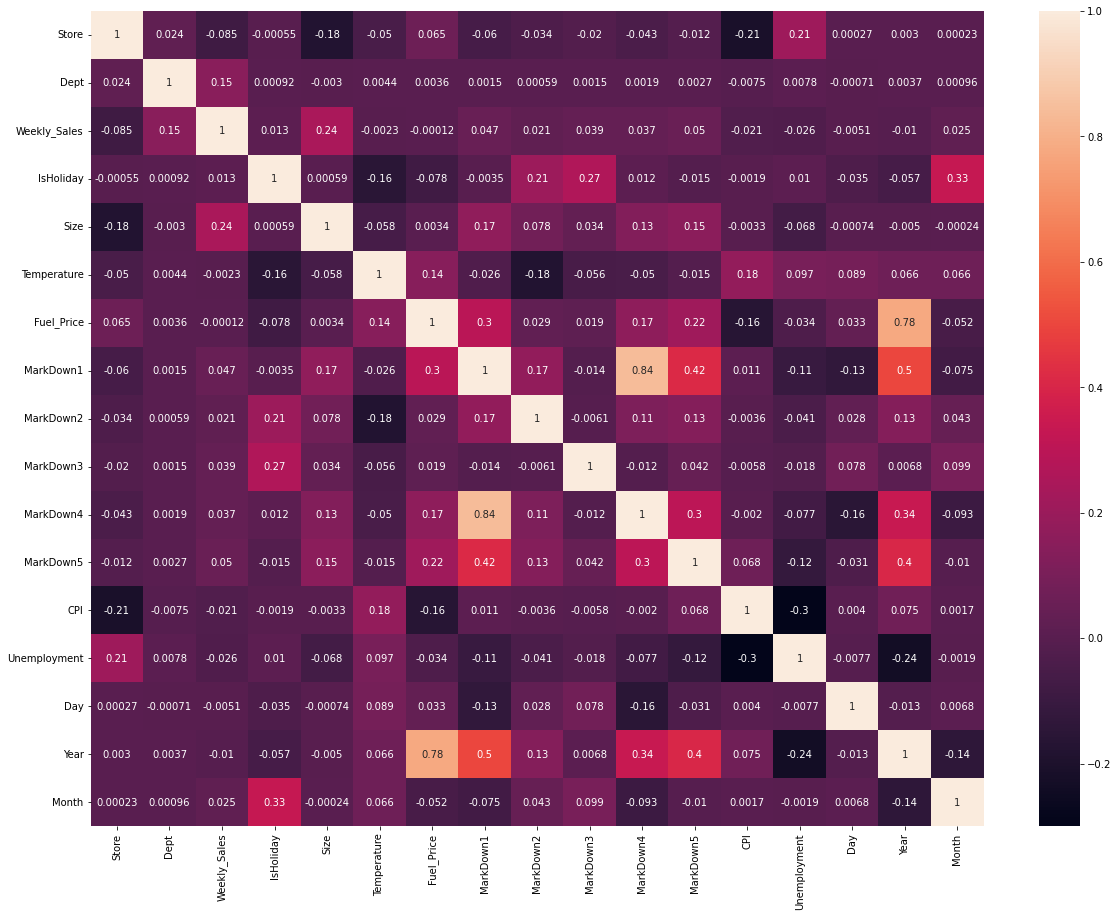

In [116]:
corr = df.corr()
plt.figure(figsize = (20,15))
sns.heatmap(corr, annot = True)

Qua bảng mối quan hệ giữa các biến, thấy được:

* Size có tương quan thuận với Weekly_Sales nhưng mối tương quan giữa hai biến không lớn.
* Dept cũng có chút tương quan đến Weekly_Sales với hệ số tương quan bằng 0.15
* Các biến còn lại chỉ có tác động rất nhỏ hoặc gần như không tác động tới Weekly_Sales

### Kết luận

* Doanh thu không thay đổi nhiều qua các năm nhưng có sự biến động lớn giữa các tháng
* Cửa hàng loại A có doanh thu cao nhất
* Doanh thu vào ngày lễ lớn hơn so với ngày thường nhưng sự chênh lệch không quá lớn
* Kích thước cửa hàng và loại phòng ban có tương quan dương với doanh thu
